#### ~~If it gives rise to an Inexact error due to a complex number with a small imaginary part (which should really be a real number), run the code once again.~~

#### Solved after using real part of (p[2]-x+0im)^p[3]

In [1]:
using Plots; using LsqFit

In [2]:
N=20;

In [3]:
x=range(0.5,0.999,N);

In [4]:
y=sqrt.(ones(N)-x)+(2*rand(N)-ones(N))/20;

In [5]:
@. model_function(x, p) = p[1]*real((p[2]-x+0im)^p[3])

model_function (generic function with 1 method)

#### It works despite unrealistic initial parameters, as long as initial value of p[2] produces real results

In [6]:
initial_params = [0.01,2.0,0.01]

3-element Vector{Float64}:
 0.01
 2.0
 0.01

In [7]:
fit_result_nonlinear = curve_fit(model_function, x, y, initial_params)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.9983745195349354, 1.0000880839980553, 0.4804722986571588], [0.031059949671332632, -0.002856776382952453, -0.031196761961517883, 0.038708817135153506, -0.008064568000978434, -0.037783475187715077, -0.025605851760719944, 0.031932350042744084, -0.012518768775263478, -0.010463527457980182, 0.05265833450664692, -0.02081814342781152, -0.010888949484444077, -0.028621099024259855, 0.02601803148205384, -0.023018607875660957, 0.05420447854920149, -0.008362322018875407, -0.014990932376856392, 0.0006896247790405471], [0.7168036087853739 0.6875677829124713 -0.4959167183271434; 0.698462973453527 0.707110566599688 -0.5208461303412415; … ; 0.17742334815677036 3.111684561383862 -0.6375075059294434; 0.03768759141129433 16.614970394595876 -0.25673713368069734], true, Float64[])

In [8]:
results_param = fit_result_nonlinear.param

3-element Vector{Float64}:
 0.9983745195349354
 1.0000880839980553
 0.4804722986571588

In [9]:
yModel = real.(model_function(x, results_param));

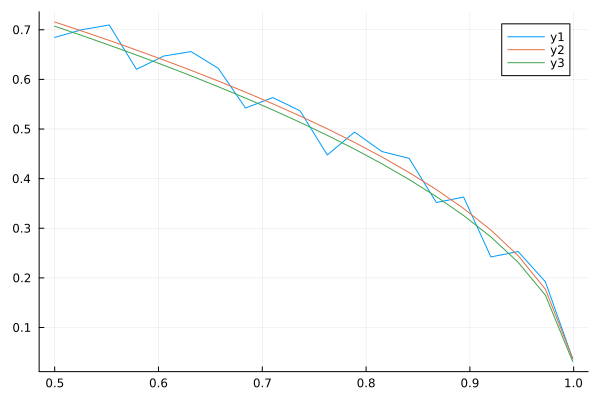

In [10]:
plt1 = plot(x,y);plt1 = plot!(x, yModel);plt1 = plot!(x,sqrt.(ones(N)-x))